In [133]:
from PIL import Image
import torch
from torch import Tensor
from torchvision.transforms import functional as F
from matplotlib import pyplot as plt
from pathlib import Path

In [108]:
path = "data/image.png"

In [109]:
# we want to split the image into chunks. Each chunk will be a row of pixels. Note we want grayscale images
chunk_length = 8
chunks_per_row = 12
num_rows = 64

In [110]:
def image_chunking(img, chunk_length, chunks_per_row, num_rows) -> Tensor:
    height = num_rows
    width = chunk_length * chunks_per_row

    img = img.resize((width, height))
    img = img.convert('L')
    tensor = F.to_tensor(img)
    return tensor

In [111]:
im = Image.open(path)

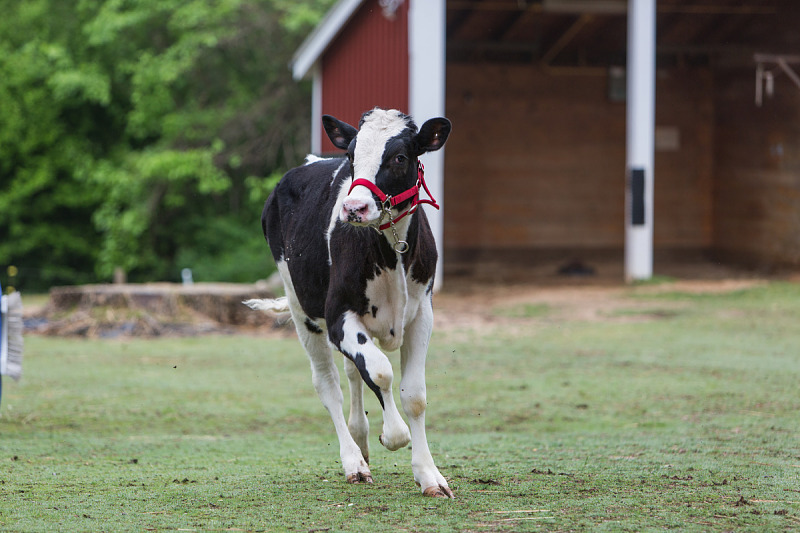

In [112]:
display(im)

In [113]:
processed = image_chunking(im, chunk_length, chunks_per_row, num_rows)

In [114]:
processed.shape

torch.Size([1, 64, 96])

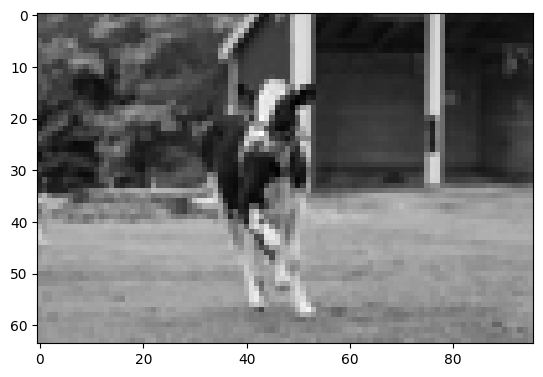

In [115]:
plt.imshow(processed[0].numpy(), cmap='gray')

In [116]:
from typing import List
from hopfield import LayerInfo, SparseHopfield, train, loss

In [117]:
layers: List[LayerInfo] = [
    LayerInfo(nodes=-1, memories=15),
    LayerInfo(nodes=3, memories=15),
    LayerInfo(nodes=1, memories=15)
]
receptive_fields = chunks_per_row * num_rows
field_dim = 8

In [118]:
net = SparseHopfield(receptive_fields=receptive_fields,field_dim=field_dim,layers=layers, alpha=3.0)

In [119]:
processed_input = processed.reshape(-1, receptive_fields, field_dim)

In [120]:
loss(net, processed_input)

(tensor(0.0487), [tensor(0.0487)])

In [121]:
prediction = net.predict(processed_input)

In [123]:
prediction = prediction.reshape(processed.shape)

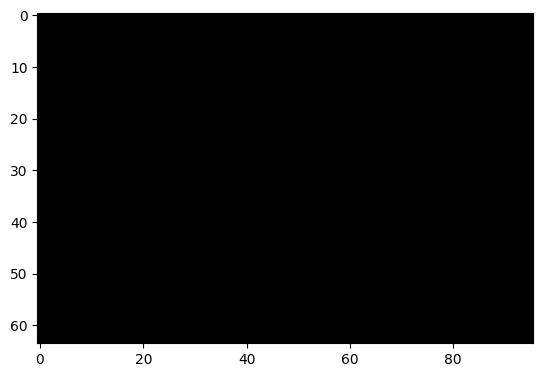

In [124]:
plt.imshow(prediction[0].numpy(), cmap='gray')

In [125]:
train(net, processed_input)

In [126]:
loss(net, processed_input)

(tensor(5.8541e-14), [tensor(5.8541e-14)])

In [130]:
prediction = net.predict(processed_input)

In [131]:
prediction = prediction.reshape(processed.shape)

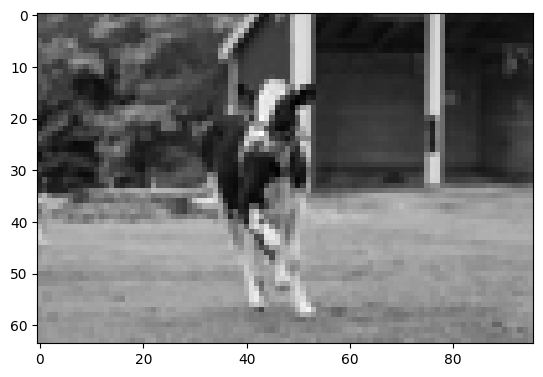

In [132]:
plt.imshow(prediction[0].numpy(), cmap='gray')